### Dataset
Dataset can be found [_here_](https://drive.google.com/drive/folders/1a9ati8HfgWOBLz4-vBqJSUE2nTrXU2nQ?usp=drive_link)

### 1. With my own CNN model

In [ ]:
# +------------------------------+
# | CNN for Paddy-Doctor-Dataset |
# +------------------------------+

import torch.nn as nn
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

epochs = 20
learning_rate = 0.001
batch_size = 32

# Define the transformation for the images
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the training dataset
train_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/<location-to-dataset>/paddy-doctor-diseases-small-400-split/train', transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)

# Load the testing dataset
test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/<location-to-dataset>/paddy-doctor-diseases-small-400-split/test', transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Example of iterating through the training data
for images, labels in train_loader:
    print(images.shape)  # Print the shape of the batch of images
    print(labels.shape)  # Print the shape of the batch of labels
    break  # Remove this line to iterate through the entire dataset

# Example of iterating through the testing data
for images, labels in test_loader:
    print(images.shape)  # Print the shape of the batch of images
    print(labels.shape)  # Print the shape of the batch of labels
    break  # Remove this line to iterate through the entire dataset


# Get first batch of training images and labels
train_images, train_labels = next(iter(train_loader))

# Display the batch of training images with labels
print("Training Images:")
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i][0])
plt.show()

# Get first batch of testing images and labels
test_images, test_labels = next(iter(test_loader))

# Display the batch of testing images with labels
print("Testing Images:")
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i][0])
plt.show()


class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(3, 6, 6)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*60*60, 1920)
        self.fc2 = nn.Linear(1920, 208)
        self.fc3 = nn.Linear(208, 13)

    def forward(self, x):
        out = self.pool(self.relu(self.conv1(x)))
        out = self.pool(self.relu(self.conv2(out)))
        out = out.view(-1, 16*60*60)
        out = self.relu(self.fc1(out))
        out = self.relu(self.fc2(out))
        out = self.fc3(out)

        return out
    
# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# model
model = NeuralNet().to(device)

# loss and the optimizer
criterian = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Move images and labels to device (GPU or CPU)
        images = images.to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterian(outputs, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print(f'epoch {epoch+1}/{epochs}, step {i+1}/{n_total_steps}, loss {loss.item(): .4f}')

# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0

for images, lables in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)

    # value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += lables.shape[0]
    n_correct += (predictions == lables).sum().item()

acc = 100.0 * n_correct / n_samples
print(f'accuracy = {acc}')

### 1. With my resnet18 CNN model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
torch.Size([32, 3, 256, 256])
torch.Size([32])
torch.Size([32, 3, 256, 256])
torch.Size([32])
Training Images:


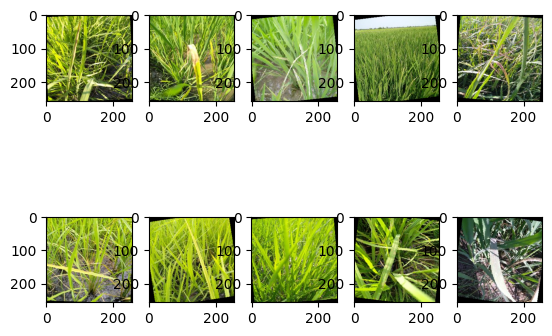

Testing Images:


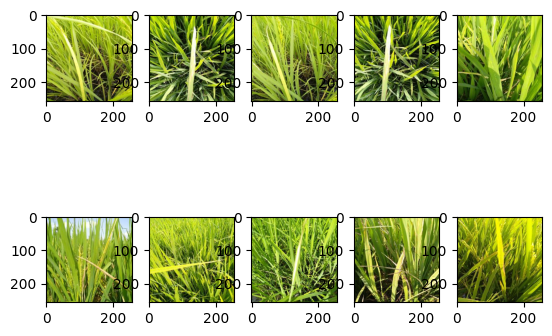

Epoch [1/20], Step [10/130], Loss: 2.3147
Epoch [1/20], Step [20/130], Loss: 1.8825
Epoch [1/20], Step [30/130], Loss: 1.4904
Epoch [1/20], Step [40/130], Loss: 1.8672
Epoch [1/20], Step [50/130], Loss: 1.4811
Epoch [1/20], Step [60/130], Loss: 1.5109
Epoch [1/20], Step [70/130], Loss: 1.6479
Epoch [1/20], Step [80/130], Loss: 1.3248
Epoch [1/20], Step [90/130], Loss: 1.3174
Epoch [1/20], Step [100/130], Loss: 0.9463
Epoch [1/20], Step [110/130], Loss: 1.1016
Epoch [1/20], Step [120/130], Loss: 1.3921
Epoch [1/20], Step [130/130], Loss: 1.1090
Validation Loss: 2.0297, Validation Accuracy: 41.92%
Epoch [2/20], Step [10/130], Loss: 1.1958
Epoch [2/20], Step [20/130], Loss: 1.5866
Epoch [2/20], Step [30/130], Loss: 0.9786
Epoch [2/20], Step [40/130], Loss: 0.7534
Epoch [2/20], Step [50/130], Loss: 1.0275
Epoch [2/20], Step [60/130], Loss: 1.2116
Epoch [2/20], Step [70/130], Loss: 0.7013
Epoch [2/20], Step [80/130], Loss: 1.1458
Epoch [2/20], Step [90/130], Loss: 0.8418
Epoch [2/20], Step 

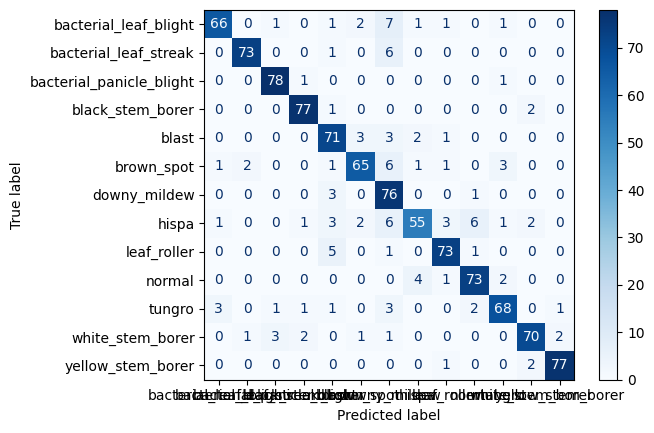

In [2]:
# +--------------------------------------------+
# | CNN for Paddy-Doctor-Dataset with resnet18 |
# +--------------------------------------------+

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from google.colab import drive

drive.mount('/content/drive')

# Hyperparameters
epochs = 20
learning_rate = 0.001
batch_size = 32

# Data augmentation and normalization
transform_train = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the training dataset
train_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/ColabNotebooks/paddy-doctor-diseases-small-400-split/train', transform=transform_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Load the testing dataset
test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/ColabNotebooks/paddy-doctor-diseases-small-400-split/test', transform=transform_test)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Example of iterating through the training data
for images, labels in train_loader:
    print(images.shape)  # Print the shape of the batch of images
    print(labels.shape)  # Print the shape of the batch of labels
    break

# Example of iterating through the testing data
for images, labels in test_loader:
    print(images.shape)  # Print the shape of the batch of images
    print(labels.shape)  # Print the shape of the batch of labels
    break

# Displaying some training images
train_images, train_labels = next(iter(train_loader))
print("Training Images:")
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i].permute(1, 2, 0) * 0.5 + 0.5)  # Undo normalization for display
plt.show()

# Displaying some testing images
test_images, test_labels = next(iter(test_loader))
print("Testing Images:")
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i].permute(1, 2, 0) * 0.5 + 0.5)  # Undo normalization for display
plt.show()

# Define the model using a pre-trained ResNet18
class PaddyDiseaseModel(nn.Module):
    def __init__(self, num_classes=13):
        super(PaddyDiseaseModel, self).__init__()
        self.model = models.resnet18(pretrained=True)
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Model
model = PaddyDiseaseModel().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop with validation
n_total_steps = len(train_loader)
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = 100 * correct / total
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

# if need to save the trained model
# FILE = "/content/drive/MyDrive/ColabNotebooks/PyTorchML/model.pth"
# torch.save(model.state_dict(), FILE)

# Detailed evaluation
all_labels = []
all_predictions = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

# Classification report
print("Classification Report:")
print(classification_report(all_labels, all_predictions, target_names=test_dataset.classes))

# Confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_dataset.classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
# +----------+
# | Not Used |
# +----------+
# function to display batch of images not used in the code
def show_batch(images, labels, classes, title="Images"):
    fig, axes = plt.subplots(int(np.ceil(len(images) / 4)), 4, figsize=(16, 16))
    fig.subplots_adjust(hspace=0.1, top=0.94)
    axes = axes.flatten()

    for i, (img, label) in enumerate(zip(images, labels)):
        npimg = img.numpy()
        ax = axes[i]
        ax.imshow(np.transpose(npimg, (1, 2, 0)))
        ax.set_title(classes[label], fontstyle='italic', fontsize='15', fontname='serif')
        ax.axis('off')

    for i in range(len(images), len(axes)):
        axes[i].axis('off')

    fig.suptitle(title, fontsize=20, color='red', fontstyle='normal', fontname='serif')
    plt.show()